# IMPORTING LIBERARIES

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

IMPORTING FILE

In [93]:
train_data=pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Exploratory Data Analysis

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Checking Null Values

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

NULL VALUE TREATMENT

In [8]:
train_data.dropna(inplace=True)

RECHECKING NULL VALUE

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

NULL VALUE HAS BEEN PROPERLY TREATED

FEATURE REMODELING

In [10]:
#converting Date_of_Journey to datetime format
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'])

D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

Checking converted Date_of_Journey to datetime format

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Extracting the month and day from the Date of Journey column

In [13]:
train_data['day_of_journey']=train_data['Date_of_Journey'].dt.day
train_data['month_of_journey']=train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


Dropping the date_of_journey column as it will not be further used anymore

In [15]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


Same as converting Dep_Time and Arrival_Time to datetime format

In [17]:
train_data['Dep_Time']=pd.to_datetime(train_data['Dep_Time'])
train_data['Arrival_Time']=pd.to_datetime(train_data['Arrival_Time'])

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-05-11 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-11 05:50:00,2023-05-11 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-11 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-11 18:05:00,2023-05-11 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-05-11 16:50:00,2023-05-11 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  object        
 1   Source            10682 non-null  object        
 2   Destination       10682 non-null  object        
 3   Route             10682 non-null  object        
 4   Dep_Time          10682 non-null  datetime64[ns]
 5   Arrival_Time      10682 non-null  datetime64[ns]
 6   Duration          10682 non-null  object        
 7   Total_Stops       10682 non-null  object        
 8   Additional_Info   10682 non-null  object        
 9   Price             10682 non-null  int64         
 10  day_of_journey    10682 non-null  int64         
 11  month_of_journey  10682 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 1.1+ MB


Extracting hours and minutes from the departure and arrival times

In [20]:
train_data['Dep_time_hr']=train_data['Dep_Time'].dt.hour
train_data['Dep_time_minute']=train_data['Dep_Time'].dt.minute
train_data['Arr_time_hr']=train_data['Arrival_Time'].dt.hour
train_data['Arr_time_minute']=train_data['Arrival_Time'].dt.minute

Dropping the dep_time and arrival_time columns

In [21]:
train_data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


DURATION

In [23]:
def duration_preprocess(value):
    lst=value.split()
    if len(lst)==2:     # if both the hours and minutes are present return it
        return value
    else:
        if 'h' in value:  # if only hour is present append 0m
            return value+' 0m'
        else:             # if only minute is present add 0h in the front
            return '0h '+value

Applying the function on the entire Duration column

In [24]:
train_data['Duration']=train_data['Duration'].apply(duration_preprocess)

Checking Data

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Extracting the hours and minutes from duration

In [26]:
train_data['duration_hours']=train_data['Duration'].apply(lambda x:int(x.split()[0][:-1]))
train_data['duration_minutes']=train_data['Duration'].apply(lambda x:int(x.split()[1][:-1]))

Dropping the duration column

In [27]:
train_data.drop('Duration',axis=1,inplace=True)

Remaining columns having object datatype

In [28]:

train_data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

Value Count of Total Stop

In [29]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Mapping non-stop to 0, 1 stop to 1, 2 stops to 2, 3 stops to 3, and 4 stops to 4

In [30]:
train_data['Total_Stops']=train_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45


Remaining columns having object datatype

In [32]:
train_data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object')

More Information

In [33]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Almost 80% of the values have no-info in the additional info column and hence does not provide any necessary insights

In [34]:
train_data.drop('Additional_Info',inplace=True,axis=1)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,3,1,16,50,21,35,4,45


Remaining columns having object Datatype

In [35]:
train_data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

AIRLINES DATA VALUE COUNT

In [36]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

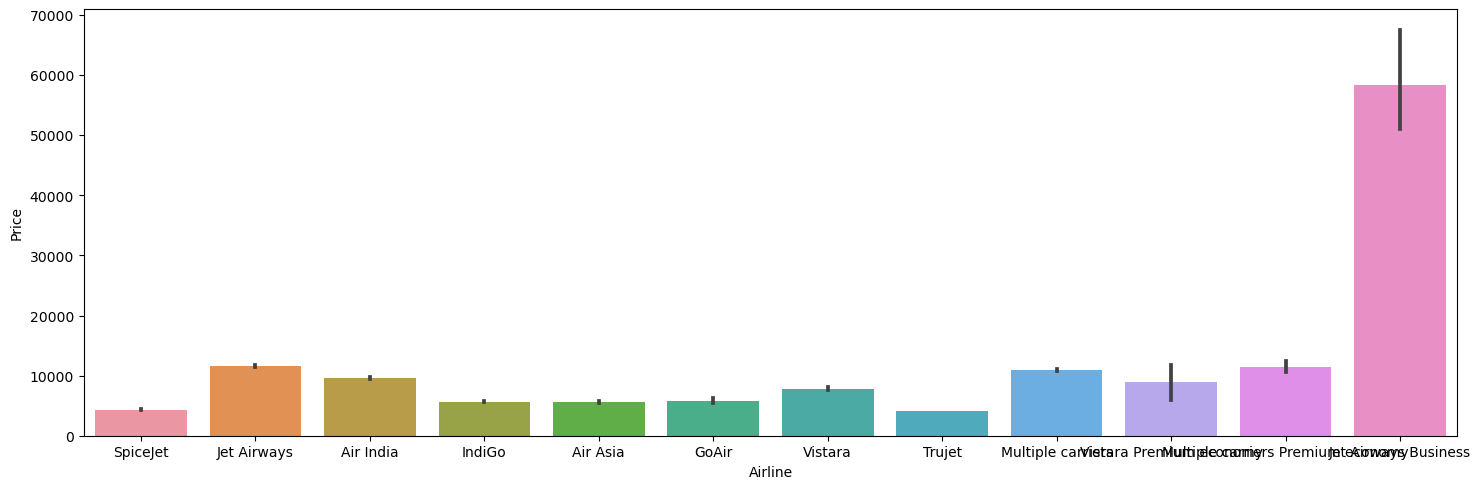

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=True))
plt.tight_layout()

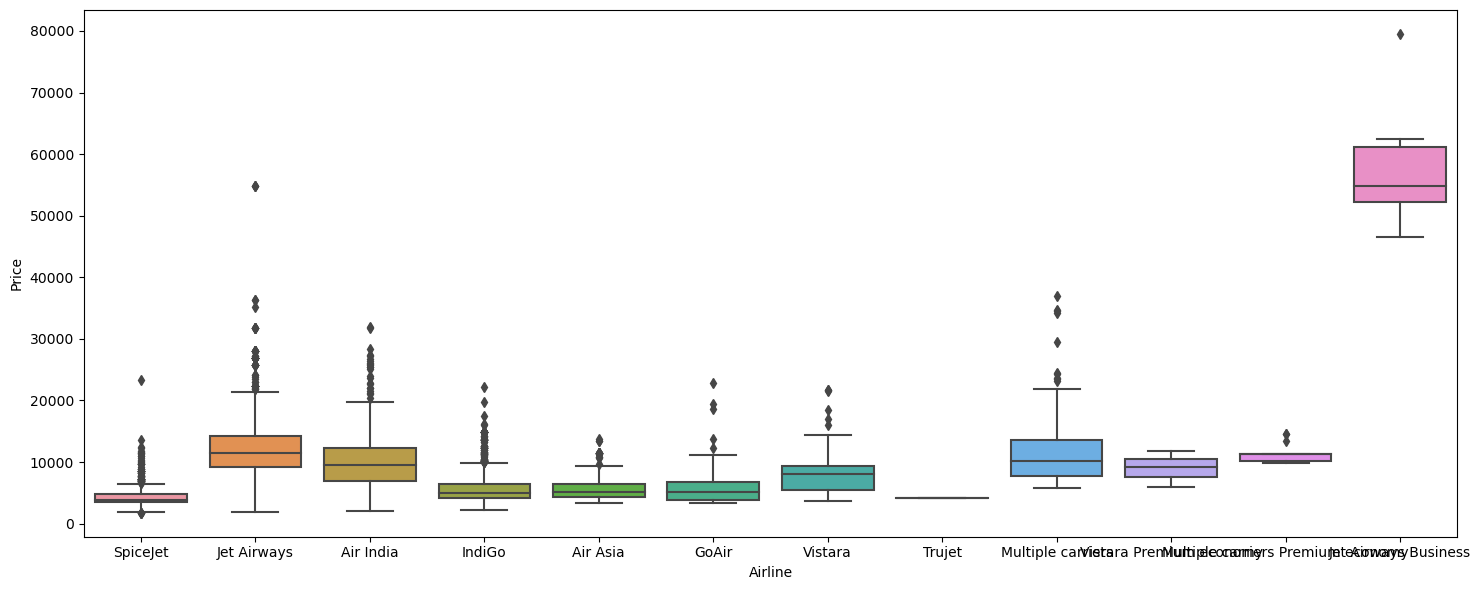

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=True))
plt.tight_layout()

Descriptional Data For Various Airlines

In [39]:
train_data.groupby('Airline').describe()['Price'].sort_values('mean',ascending=True)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Trujet,1.0,4140.000000,NaN,4140.0,4140.0,4140.0,4140.00,4140.0
SpiceJet,818.0,4338.284841,1849.922514,1759.0,3574.5,3873.0,4760.00,23267.0
Air Asia,319.0,5590.260188,2027.362290,3383.0,4282.0,5162.0,6451.00,13774.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0


Using One Hot Encoding

In [40]:
Airline=pd.get_dummies(train_data['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Concatinating the Airline dataframe with the train_data dataframe

In [41]:
train_data=pd.concat([train_data,Airline],axis=1)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,6,9,9,25,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,5,12,18,5,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,3,1,16,50,...,0,1,0,0,0,0,0,0,0,0


Dropping the Airline column

In [42]:
train_data.drop('Airline',axis=1,inplace=True)

Source And Destination Related Value Count

In [43]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [44]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

WE ARE USING ONE HOT ENCODING AS THERE ARE CATEGORICAL VALUES ONLY 5-6 VALUES ARE THERE AND THAT WOULD BE REPETATIVE ONLY

In [45]:
train_data=pd.get_dummies(data=train_data,columns=['Source','Destination'],drop_first=True)

In [46]:
train_data.head()

,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,6,9,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,6218,5,12,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,13302,3,1,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


Checking all the Features/Column Names

In [47]:
train_data.columns

Index(['Route', 'Total_Stops', 'Price', 'day_of_journey', 'month_of_journey',
       'Dep_time_hr', 'Dep_time_minute', 'Arr_time_hr', 'Arr_time_minute',
       'duration_hours', 'duration_minutes', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

Remaining columns of object datatype

In [48]:
train_data.select_dtypes(['object']).columns

Index(['Route'], dtype='object')

Route 

In [49]:
route=train_data.select_dtypes(['object'])
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [50]:
train_data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

There are maximum 4 stops for a flight and hence the number of routes would be 5 (a -> b -> c -> d -> e -> f)

In [51]:
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[2]
route['Route_4']=route['Route'].str.split('→').str[3]
route['Route_5']=route['Route'].str.split('→').str[4]

In [52]:
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [53]:
# fill the NaN values with None
route.fillna('None',inplace=True)
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


HENCE DATA HAS BEEN SEGREGATED PROPERLY

In [54]:
for i in range(1,6):
    col='Route_'+str(i)
    val=route[col].nunique()
    print(f'Number of categories in {col} is: {val}')

Number of categories in Route_1 is: 5
Number of categories in Route_2 is: 45
Number of categories in Route_3 is: 30
Number of categories in Route_4 is: 14
Number of categories in Route_5 is: 6


HERE IN ROUTE WE CAN SEE TOO MANY CATEGORIES SO WE CAN USE LABEL ENCODING NOT ONE HOT ENCODING 

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
label_encoder=LabelEncoder()

In [57]:
for i in range(1,6):
    col='Route_'+str(i)
    route[col]=label_encoder.fit_transform(route[col])

In [58]:
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


Dropping the Route column

In [59]:
route.drop('Route',inplace=True,axis=1)
route.head(2)

,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5


Concatinating route and train_data

In [60]:
train_data=pd.concat([train_data,route],axis=1)
train_data.head(2)

,Route,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,1,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7,...,0,0,0,0,0,2,25,1,3,5


Dropping the route column from train_data

In [61]:
train_data.drop('Route',inplace=True,axis=1)
train_data.head(2)

,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,1,0,13,29,13,5
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,2,25,1,3,5


In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   day_of_journey                     10682 non-null  int64
 3   month_of_journey                   10682 non-null  int64
 4   Dep_time_hr                        10682 non-null  int64
 5   Dep_time_minute                    10682 non-null  int64
 6   Arr_time_hr                        10682 non-null  int64
 7   Arr_time_minute                    10682 non-null  int64
 8   duration_hours                     10682 non-null  int64
 9   duration_minutes                   10682 non-null  int64
 10  Air India                          10682 non-null  uint8
 11  GoAir                              10682 non-null  uint8
 12  IndiGo            

Outlier Detection 

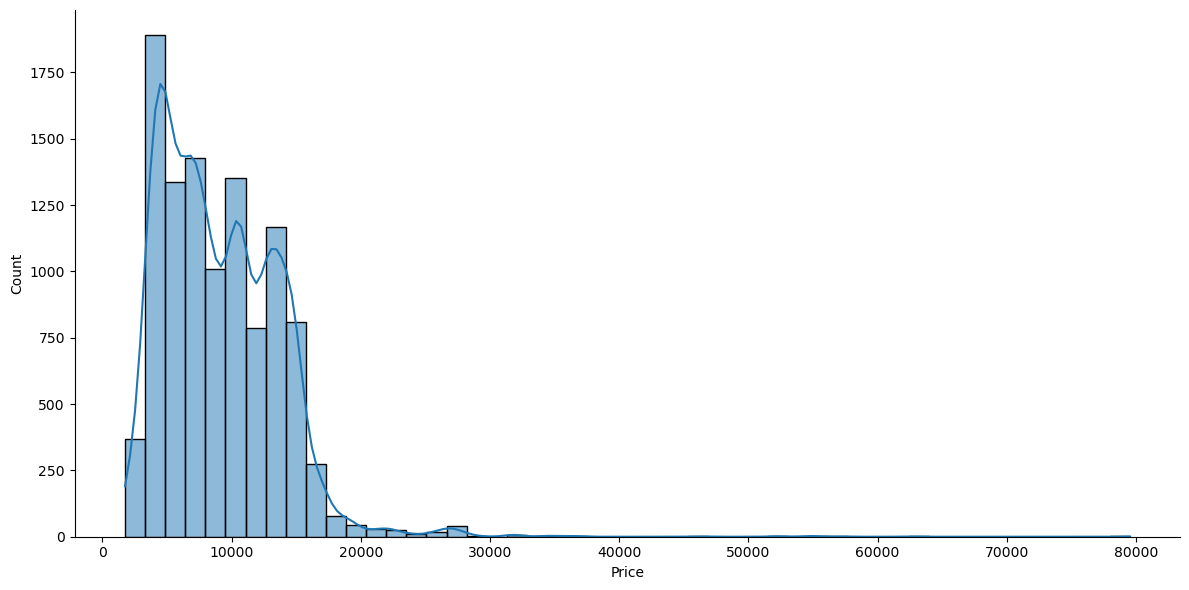

In [63]:
sns.displot(train_data['Price'],bins=50,aspect=2,height=6,kde=True)

In [64]:
train_data[train_data['Price']>40000]

,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
657,1,52229,3,1,5,45,10,45,5,0,...,0,0,0,0,1,0,7,8,13,5
1478,1,54826,18,3,18,40,0,45,6,5,...,0,0,0,0,1,0,7,8,13,5
2618,1,54826,18,3,22,50,5,5,6,15,...,0,0,0,0,1,0,7,8,13,5
2924,1,79512,3,1,5,45,11,25,5,40,...,0,0,0,0,1,0,7,8,13,5
5372,1,62427,3,1,5,45,12,25,6,40,...,0,0,0,0,1,0,7,8,13,5
5439,1,54826,3,1,16,55,23,0,6,5,...,0,0,0,0,1,0,7,8,13,5
7351,2,46490,3,3,20,5,4,25,8,20,...,1,0,0,0,0,3,1,4,5,5
9715,2,52285,3,6,20,5,4,25,8,20,...,1,0,0,0,0,3,1,4,5,5
10364,1,57209,3,1,9,45,14,25,4,40,...,0,0,0,0,1,0,33,8,13,5


There are some outliers in the dataset where the airfare is over 40000, which could negatively impact the accuracy of machine learning models. To address this issue, it may be better to replace those outliers with the median price of the entire dataset.

Replacing airfare of more than 40000 with the median price

In [65]:
train_data['Price']=np.where(train_data['Price']>40000,train_data['Price'].median(),train_data['Price'])

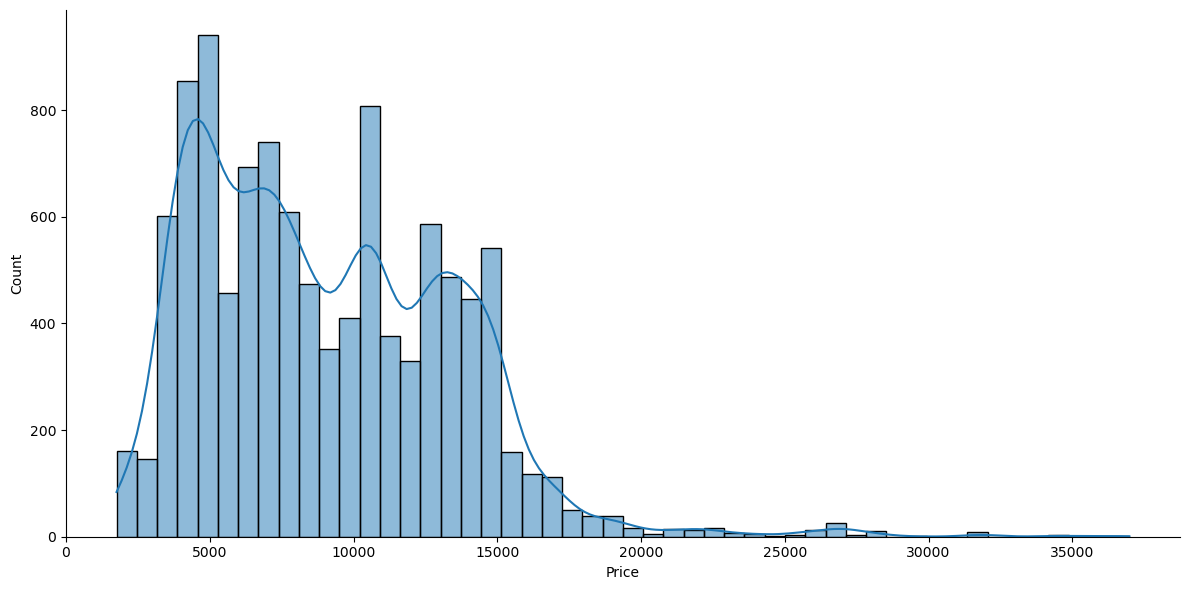

In [66]:
sns.displot(train_data['Price'],bins=50,aspect=2,height=6,kde=True)

MACHINE LEARNING PART

Spliting Data into Target and Feature

In [68]:
X=train_data.drop('Price',axis=1)   # all columns except the price column
y=train_data['Price']               # the price column for which we are predicting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    # 70% train, 30% test

DEFINING METRICS

In [75]:
# Defining a function that prints out all the metrics
def metrics(y_true,y_pred):
    print(f'MAE: ',mean_absolute_error(y_true,y_pred))
    print(f'MSE: ',mean_squared_error(y_true,y_pred))
    print(f'RMSE: ',mean_squared_error(y_true,y_pred)**0.5)
    print(f'Explained Variance Score: ',explained_variance_score(y_true,y_pred))

# function for calculating the accuracy
def accuracy(y_true,y_predictions):
    errors = abs(y_predictions - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy_model = 100 - mape
    return accuracy_model

USING RANDOM FOREST

In [76]:
# creating an instance of the Random Forest model
model_random_forest=RandomForestRegressor(n_estimators=500,min_samples_split=3)

# fitting the model
model_random_forest.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [78]:
# making predictions on the test data
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
predictions_random_forest=model_random_forest.predict(X_test)

metrics(y_test,predictions_random_forest)

MAE:  1121.4502692460148
MSE:  3464535.372052645
RMSE:  1861.3262400913616
Explained Variance Score:  0.8223326516728537


In [79]:
accuracy(y_test,predictions_random_forest) 

87.61937955758866

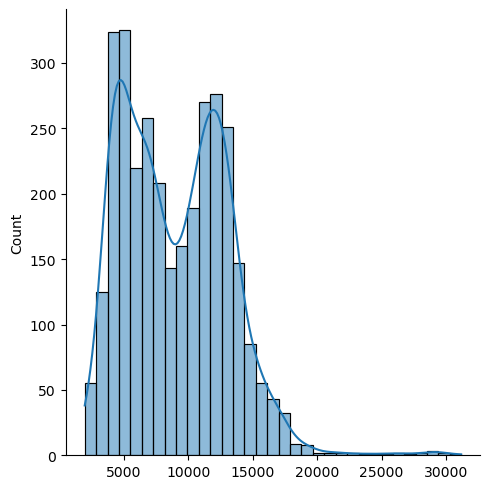

In [86]:
sns.displot(predictions_random_forest,kde=True)